In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sea
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
import xgboost as xgb
import tensorflow as tf

In [2]:
df = pd.read_csv('SolAtasIMC_tratado.csv')

Imprimimos la información general de los datos

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36400 entries, 0 to 36399
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    36400 non-null  object 
 1   open    36400 non-null  float64
 2   high    36400 non-null  float64
 3   low     36400 non-null  float64
 4   close   36400 non-null  float64
 5   value   36400 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 1.7+ MB


In [4]:
tamanio = df.shape[0]

Creamos los conjuntos de entrenamiento, validación y test

In [5]:
df_train = df.copy().loc[0:int(tamanio*0.7)]
df_train

,date,open,high,low,close,value
0,2020-08-12 03:00:00,3.10,3.35,3.10,3.25,75
1,2020-08-12 04:00:00,3.25,3.25,3.15,3.15,75
2,2020-08-12 05:00:00,3.15,3.30,3.15,3.30,75
3,2020-08-12 06:00:00,3.30,3.30,3.15,3.30,75
4,2020-08-12 07:00:00,3.25,3.25,3.20,3.25,75
...,...,...,...,...,...,...
25476,2023-07-11 21:00:00,22.00,22.05,21.90,22.00,57
25477,2023-07-11 22:00:00,22.00,22.10,21.90,22.00,57
25478,2023-07-11 23:00:00,22.00,22.05,21.75,21.95,57
25479,2023-07-12 00:00:00,21.95,22.10,21.90,22.05,64


In [6]:
df_vali = df.copy().loc[int(tamanio*0.7 + 1):int(tamanio*0.9)]
df_vali

,date,open,high,low,close,value
25481,2023-07-12 02:00:00,22.10,22.30,22.05,22.15,64
25482,2023-07-12 03:00:00,22.15,22.25,22.10,22.10,64
25483,2023-07-12 04:00:00,22.10,22.10,22.00,22.00,64
25484,2023-07-12 05:00:00,22.00,22.00,21.90,21.95,64
25485,2023-07-12 06:00:00,21.95,22.05,21.90,22.00,64
...,...,...,...,...,...,...
32756,2024-05-10 05:00:00,153.65,154.35,152.85,153.95,66
32757,2024-05-10 06:00:00,153.95,154.70,153.45,153.75,66
32758,2024-05-10 07:00:00,153.75,154.10,152.30,153.30,66
32759,2024-05-10 08:00:00,153.30,155.10,153.15,154.95,66


In [7]:
df_test = df.copy().loc[int(tamanio*0.9 + 1):tamanio]
df_test

,date,open,high,low,close,value
32761,2024-05-10 10:00:00,154.35,154.5,153.45,154.10,66
32762,2024-05-10 11:00:00,154.10,154.8,153.25,154.15,66
32763,2024-05-10 12:00:00,154.15,154.3,153.25,154.15,66
32764,2024-05-10 13:00:00,154.15,155.2,153.00,155.05,66
32765,2024-05-10 14:00:00,155.05,155.4,153.10,153.30,66
...,...,...,...,...,...,...
36395,2024-10-08 20:00:00,143.35,143.9,142.35,142.95,49
36396,2024-10-08 21:00:00,142.95,144.1,142.25,143.75,49
36397,2024-10-08 22:00:00,143.75,144.5,143.35,144.50,49
36398,2024-10-08 23:00:00,144.50,144.7,144.05,144.25,49


Declaramos el modelo RandomForestRegressor

In [8]:
regr1 = RandomForestRegressor(max_depth=100, random_state=0)

Preparamos los datos en el formato necesario para entrenar el algoritmo

In [9]:
X1 = []
y1= []
for i in range(0, df_train.shape[0] - 1):
    auxy = df_train.iloc[i + 1]
    y1.append(auxy.close)
    aux = df_train.iloc[i]
    aux1 = []
    for r in range(1, aux.size):
        aux1.append(aux[r])
    X1.append(aux1)

C:\Users\raulg\AppData\Local\Temp\ipykernel_18712\2244255699.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  aux1.append(aux[r])


Entrenamos el algoritmo

In [10]:
regr1.fit(X1, y1)

RandomForestRegressor(max_depth=100, random_state=0)

Probamos el algoritmo con los datos de validación

In [11]:
Vali1 = []
aux = df_vali.iloc[0]
for r in range (0,df_vali.shape[0] - 1):
    aux = df_vali.iloc[r]
    Vali1aux = []
    for i in range(1, aux.size):
        Vali1aux.append(aux[i])
    Vali1.append(Vali1aux)
predict = regr1.predict(Vali1)
print(predict)

C:\Users\raulg\AppData\Local\Temp\ipykernel_18712\3274649085.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Vali1aux.append(aux[i])


[ 22.1805  22.116   22.0085 ... 153.837  153.1125 155.9625]


In [12]:
Valirpr = []
for i in range(1,df_vali.shape[0]):
    Valirpr.append(df_vali.iloc[i].close)

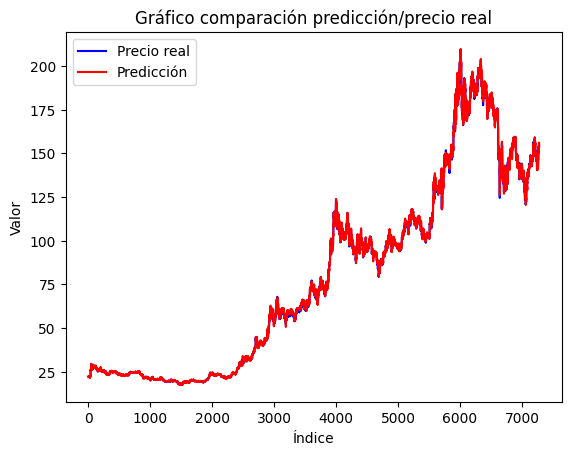

In [13]:
plt.plot(Valirpr, color='blue', label='Precio real')  # Línea azul
plt.plot(predict, color='red', label='Predicción')   # Línea roja
plt.title('Gráfico comparación predicción/precio real')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend() 

plt.show()

In [14]:
suma = 0
n = len(Valirpr)
mae = np.mean(np.abs(Valirpr - predict))
print("El error medio absoluto es: " + str(mae))
for i in range(0,n):
    suma = abs(predict[i] - Valirpr[i])/Valirpr[i] +  suma
error_medio = suma/n
emp = error_medio*100 # error medio en porcentaje
print("El error medio porcentualemente es: " + str(emp))

El error medio absoluto es: 0.8113275540694354
El error medio porcentualemente es: 0.9670508918721916


Probamos el algoritmo con los datos de test

In [15]:
Test1 = []
aux = df_test.iloc[0]
for r in range (0,df_test.shape[0] - 1):
    aux = df_test.iloc[r]
    Test1aux = []
    for i in range(1, aux.size):
        Test1aux.append(aux[i])
    Test1.append(Test1aux)
predictT = regr1.predict(Test1)
print(predictT)

C:\Users\raulg\AppData\Local\Temp\ipykernel_18712\886282011.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Test1aux.append(aux[i])


[154.31   153.732  154.3395 ... 142.393  142.6115 142.779 ]


In [16]:
Testrpr = []
for i in range(1,df_test.shape[0]):
    Testrpr.append(df_test.iloc[i].close)

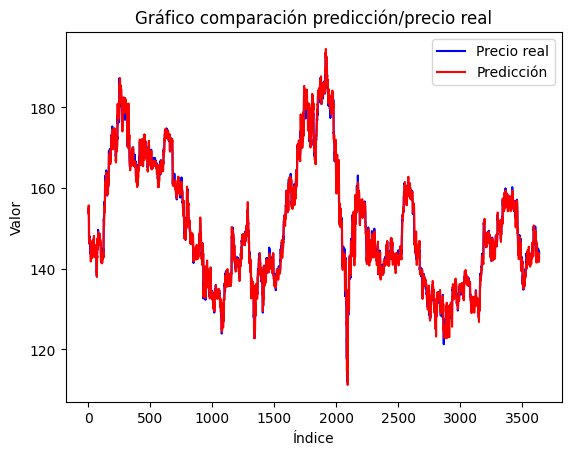

In [17]:
plt.plot(Testrpr, color='blue', label='Precio real')  # Línea azul
plt.plot(predictT, color='red', label='Predicción')   # Línea roja
plt.title('Gráfico comparación predicción/precio real')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend() 

plt.show()

In [18]:
suma = 0
n = len(Testrpr)
mae = np.mean(np.abs(Testrpr - predictT))
print("El error medio absoluto es: " + str(mae))
for i in range(0,n):
    suma = abs(predictT[i] - Testrpr[i])/Testrpr[i] +  suma
error_medio = suma/n
emp = error_medio*100 # error medio en porcentaje
print("El error medio porcentualemente es: " + str(emp))

El error medio absoluto es: 1.1719781473336992
El error medio porcentualemente es: 0.7826227595698083


# Predicción Utilizando XGBoost

In [19]:
df_xgb = df.copy()
df_xgb['close_next'] = df_xgb['close'].shift(-1)

In [20]:
df_xgb = df_xgb.dropna()
df_xgb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36399 entries, 0 to 36398
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        36399 non-null  object 
 1   open        36399 non-null  float64
 2   high        36399 non-null  float64
 3   low         36399 non-null  float64
 4   close       36399 non-null  float64
 5   value       36399 non-null  int64  
 6   close_next  36399 non-null  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 2.2+ MB


In [21]:
tamanio_xgb = df_xgb.shape[0]
tamanio_xgb

36399

In [22]:
df_train_xgb = df_xgb.copy().loc[0:int(tamanio_xgb*0.7)]
df_train_xgb

,date,open,high,low,close,value,close_next
0,2020-08-12 03:00:00,3.10,3.35,3.10,3.25,75,3.15
1,2020-08-12 04:00:00,3.25,3.25,3.15,3.15,75,3.30
2,2020-08-12 05:00:00,3.15,3.30,3.15,3.30,75,3.30
3,2020-08-12 06:00:00,3.30,3.30,3.15,3.30,75,3.25
4,2020-08-12 07:00:00,3.25,3.25,3.20,3.25,75,3.25
...,...,...,...,...,...,...,...
25475,2023-07-11 20:00:00,22.10,22.10,21.95,22.00,57,22.00
25476,2023-07-11 21:00:00,22.00,22.05,21.90,22.00,57,22.00
25477,2023-07-11 22:00:00,22.00,22.10,21.90,22.00,57,21.95
25478,2023-07-11 23:00:00,22.00,22.05,21.75,21.95,57,22.05


In [23]:
df_vali_xgb = df_xgb.copy().loc[int(tamanio_xgb*0.7 + 1):int(tamanio_xgb*0.9)]
df_vali_xgb

,date,open,high,low,close,value,close_next
25480,2023-07-12 01:00:00,22.05,22.15,22.00,22.10,64,22.15
25481,2023-07-12 02:00:00,22.10,22.30,22.05,22.15,64,22.10
25482,2023-07-12 03:00:00,22.15,22.25,22.10,22.10,64,22.00
25483,2023-07-12 04:00:00,22.10,22.10,22.00,22.00,64,21.95
25484,2023-07-12 05:00:00,22.00,22.00,21.90,21.95,64,22.00
...,...,...,...,...,...,...,...
32755,2024-05-10 04:00:00,153.40,153.80,152.70,153.65,66,153.95
32756,2024-05-10 05:00:00,153.65,154.35,152.85,153.95,66,153.75
32757,2024-05-10 06:00:00,153.95,154.70,153.45,153.75,66,153.30
32758,2024-05-10 07:00:00,153.75,154.10,152.30,153.30,66,154.95


In [24]:
df_test_xgb = df_xgb.copy().loc[int(tamanio_xgb*0.9 + 1):tamanio_xgb]
df_test_xgb

,date,open,high,low,close,value,close_next
32760,2024-05-10 09:00:00,154.95,155.75,154.25,154.35,66,154.10
32761,2024-05-10 10:00:00,154.35,154.50,153.45,154.10,66,154.15
32762,2024-05-10 11:00:00,154.10,154.80,153.25,154.15,66,154.15
32763,2024-05-10 12:00:00,154.15,154.30,153.25,154.15,66,155.05
32764,2024-05-10 13:00:00,154.15,155.20,153.00,155.05,66,153.30
...,...,...,...,...,...,...,...
36394,2024-10-08 19:00:00,143.80,143.95,142.40,143.35,49,142.95
36395,2024-10-08 20:00:00,143.35,143.90,142.35,142.95,49,143.75
36396,2024-10-08 21:00:00,142.95,144.10,142.25,143.75,49,144.50
36397,2024-10-08 22:00:00,143.75,144.50,143.35,144.50,49,144.25


Definimos los datos y características del entrenamiento

In [25]:
X = df_train_xgb[['open', 'high', 'low', 'close']] 
y = df_train_xgb['close_next']
X1 = df_vali_xgb[['open', 'high', 'low', 'close']] 
y1 = df_vali_xgb['close_next']

In [26]:
dtrain = xgb.DMatrix(data=X, label=y)
dvali = xgb.DMatrix(data=X1, label=y1)

In [27]:
param = {'max_depth': 10, 'eta': 0.1, 'objective': 'reg:squarederror'}
evals = [(dtrain, 'train'), (dvali, 'validacion')]

Entrenamos el modelo XGBoost

In [28]:
bst = xgb.train(param, dtrain, num_boost_round=1000, evals=evals, early_stopping_rounds=10, verbose_eval=10)

[0]	train-rmse:52.03058	validacion-rmse:55.14741
[10]	train-rmse:18.24075	validacion-rmse:19.29663
[20]	train-rmse:6.47113	validacion-rmse:6.89713
[30]	train-rmse:2.49259	validacion-rmse:2.78981
[40]	train-rmse:1.33772	validacion-rmse:1.70668
[50]	train-rmse:1.09531	validacion-rmse:1.52521
[60]	train-rmse:1.05078	validacion-rmse:1.50811
[70]	train-rmse:1.03892	validacion-rmse:1.50938


Lo probamos con los datos de validación

In [29]:
predict_xgb = bst.predict(dvali)

In [30]:
Valirpr_xgb = []
for i in range(0,df_vali_xgb.shape[0]):
    Valirpr_xgb.append(df_vali_xgb.iloc[i].close)

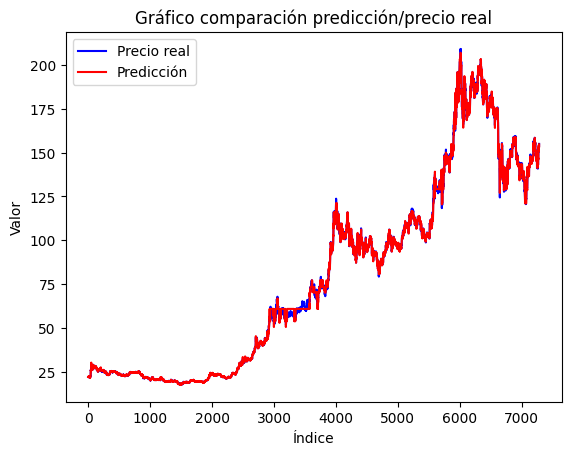

In [31]:
plt.plot(Valirpr_xgb, color='blue', label='Precio real')  # Línea azul
plt.plot(predict_xgb, color='red', label='Predicción')   # Línea roja
plt.title('Gráfico comparación predicción/precio real')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend() 

plt.show()

In [32]:
suma = 0
n = len(Valirpr_xgb)
mae = np.mean(np.abs(Valirpr_xgb - predict_xgb))
print("El error medio absoluto es: " + str(mae))
for i in range(0,n):
    suma = abs(predict_xgb[i] - Valirpr_xgb[i])/Valirpr_xgb[i] +  suma
error_medio = suma/n
emp = error_medio*100 # error medio en porcentaje
print("El error medio porcentualemente es: " + str(emp))

El error medio absoluto es: 0.5122382410279995
El error medio porcentualemente es: 0.6814544222019102


Preparamos los datos de test en el formato necesario

In [33]:
df_test_xgb_aux = df_test_xgb.iloc[:-1].copy()
X_test = df_test_xgb_aux[['open', 'high', 'low', 'close']] 
y_test = df_test_xgb_aux['close_next']
dtest = xgb.DMatrix(data=X_test, label=y_test)

Lo probamos con los datos de test

In [34]:
predict_xgb_test = bst.predict(dtest)

In [35]:
Test_xgb = []
for i in range(1,df_test_xgb.shape[0]):
    Test_xgb.append(df_test_xgb.iloc[i].close)

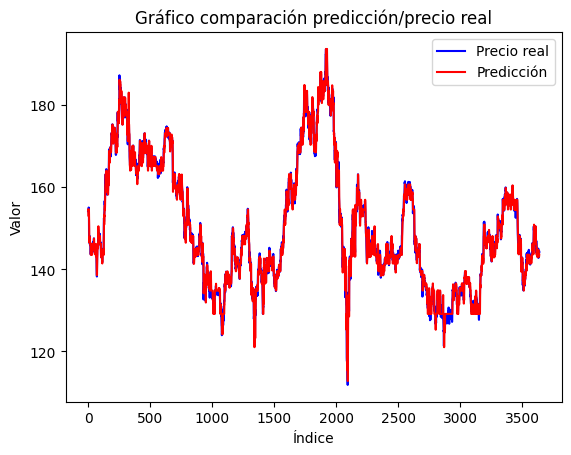

In [36]:
plt.plot(Test_xgb, color='blue', label='Precio real')  # Línea azul
plt.plot(predict_xgb_test, color='red', label='Predicción')   # Línea roja
plt.title('Gráfico comparación predicción/precio real')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend() 

plt.show()

In [37]:
suma = 0
n = len(Test_xgb)
mae = np.mean(np.abs(Test_xgb - predict_xgb_test))
print("El error medio absoluto es: " + str(mae))
for i in range(0,n):
    suma = abs(predict_xgb_test[i] - Test_xgb[i])/Test_xgb[i] +  suma
error_medio = suma/n
emp = error_medio*100 # error medio en porcentaje
print("El error medio porcentualemente es: " + str(emp))

El error medio absoluto es: 1.0809644047934774
El error medio porcentualemente es: 0.7275942239749614


# Entrenamos un modelo de red neuronal

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [39]:
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i+n_steps])
        y.append(data[i+n_steps, 3])  
    return np.array(X), np.array(y)
df_train_aux = df_train[['open', 'high', 'low', 'close', 'value']].values
X_train, y_train= create_sequences(df_train_aux, 7)
X_train

array([[[ 3.1 ,  3.35,  3.1 ,  3.25, 75.  ],
        [ 3.25,  3.25,  3.15,  3.15, 75.  ],
        [ 3.15,  3.3 ,  3.15,  3.3 , 75.  ],
        ...,
        [ 3.25,  3.25,  3.2 ,  3.25, 75.  ],
        [ 3.25,  3.3 ,  3.15,  3.25, 75.  ],
        [ 3.25,  3.4 ,  3.25,  3.4 , 75.  ]],

       [[ 3.25,  3.25,  3.15,  3.15, 75.  ],
        [ 3.15,  3.3 ,  3.15,  3.3 , 75.  ],
        [ 3.3 ,  3.3 ,  3.15,  3.3 , 75.  ],
        ...,
        [ 3.25,  3.3 ,  3.15,  3.25, 75.  ],
        [ 3.25,  3.4 ,  3.25,  3.4 , 75.  ],
        [ 3.35,  3.55,  3.35,  3.45, 75.  ]],

       [[ 3.15,  3.3 ,  3.15,  3.3 , 75.  ],
        [ 3.3 ,  3.3 ,  3.15,  3.3 , 75.  ],
        [ 3.25,  3.25,  3.2 ,  3.25, 75.  ],
        ...,
        [ 3.25,  3.4 ,  3.25,  3.4 , 75.  ],
        [ 3.35,  3.55,  3.35,  3.45, 75.  ],
        [ 3.45,  3.7 ,  3.4 ,  3.7 , 75.  ]],

       ...,

       [[22.1 , 22.4 , 21.95, 22.2 , 57.  ],
        [22.2 , 22.25, 21.9 , 22.15, 57.  ],
        [22.15, 22.2 , 21.95, 22.1 , 57.  

In [40]:
df_vali_aux = df_vali[['open', 'high', 'low', 'close', 'value']].values
X_vali, y_vali= create_sequences(df_vali_aux, 7)
X_vali

array([[[ 22.1 ,  22.3 ,  22.05,  22.15,  64.  ],
        [ 22.15,  22.25,  22.1 ,  22.1 ,  64.  ],
        [ 22.1 ,  22.1 ,  22.  ,  22.  ,  64.  ],
        ...,
        [ 21.95,  22.05,  21.9 ,  22.  ,  64.  ],
        [ 22.  ,  22.1 ,  22.  ,  22.05,  64.  ],
        [ 22.  ,  22.2 ,  22.  ,  22.05,  64.  ]],

       [[ 22.15,  22.25,  22.1 ,  22.1 ,  64.  ],
        [ 22.1 ,  22.1 ,  22.  ,  22.  ,  64.  ],
        [ 22.  ,  22.  ,  21.9 ,  21.95,  64.  ],
        ...,
        [ 22.  ,  22.1 ,  22.  ,  22.05,  64.  ],
        [ 22.  ,  22.2 ,  22.  ,  22.05,  64.  ],
        [ 22.05,  22.15,  22.  ,  22.05,  64.  ]],

       [[ 22.1 ,  22.1 ,  22.  ,  22.  ,  64.  ],
        [ 22.  ,  22.  ,  21.9 ,  21.95,  64.  ],
        [ 21.95,  22.05,  21.9 ,  22.  ,  64.  ],
        ...,
        [ 22.  ,  22.2 ,  22.  ,  22.05,  64.  ],
        [ 22.05,  22.15,  22.  ,  22.05,  64.  ],
        [ 22.05,  22.05,  21.95,  22.05,  64.  ]],

       ...,

       [[150.35, 153.4 , 150.15, 152.95,  

In [41]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(35,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mape')

C:\Users\raulg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [42]:
X_trainR = []
for i in X_train:
    aux = []
    for r in range(0, 7):
        for elem in i[r]:
            aux.append(elem)
    X_trainR.append(aux)       
X_trainR = np.array(X_trainR)  

In [43]:
X_valiR = []
for i in X_vali:
    aux = []
    for r in range(0, 7):
        for elem in i[r]:
            aux.append(elem)
    X_valiR.append(aux)  
X_valiR = np.array(X_valiR)

In [44]:
history = model.fit(X_trainR, y_train, epochs=15, batch_size=96, validation_data=(X_valiR, y_vali), shuffle=False)

Epoch 1/15
266/266 ━━━━━━━━━━━━━━━━━━━━ 1s 977us/step - loss: 87.3480 - val_loss: 13.5437
Epoch 2/15
266/266 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step - loss: 36.1957 - val_loss: 4.7559
Epoch 3/15
266/266 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step - loss: 25.1785 - val_loss: 1.7093
Epoch 4/15
266/266 ━━━━━━━━━━━━━━━━━━━━ 0s 653us/step - loss: 14.7379 - val_loss: 5.3739
Epoch 5/15
266/266 ━━━━━━━━━━━━━━━━━━━━ 0s 623us/step - loss: 15.2296 - val_loss: 1.5343
Epoch 6/15
266/266 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step - loss: 14.6604 - val_loss: 11.5016
Epoch 7/15
266/266 ━━━━━━━━━━━━━━━━━━━━ 0s 672us/step - loss: 8.3672 - val_loss: 4.6506
Epoch 8/15
266/266 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step - loss: 19.4635 - val_loss: 1.5065
Epoch 9/15
266/266 ━━━━━━━━━━━━━━━━━━━━ 0s 642us/step - loss: 15.0738 - val_loss: 5.5904
Epoch 10/15
266/266 ━━━━━━━━━━━━━━━━━━━━ 0s 641us/step - loss: 8.4445 - val_loss: 1.8985
Epoch 11/15
266/266 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step - loss: 21.0772 - val_loss: 1.4476
Epoch 12/15
266/266

In [45]:
y_pred = model.predict(X_valiR)
y_pred

228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step


array([[ 22.201277],
       [ 22.211697],
       [ 22.212946],
       ...,
       [152.80057 ],
       [153.02052 ],
       [152.99284 ]], dtype=float32)

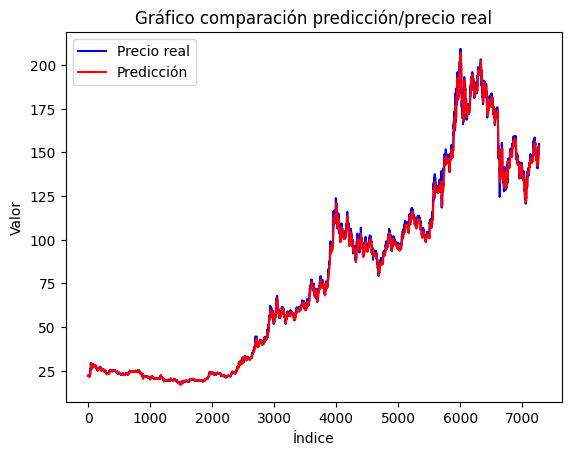

In [46]:
Valirpr = []
for i in range(7,df_vali.shape[0]):
    Valirpr.append(df_vali.iloc[i].close)
plt.plot(Valirpr, color='blue', label='Precio real')  # Línea azul
plt.plot(y_pred, color='red', label='Predicción')   # Línea roja
plt.title('Gráfico comparación predicción/precio real')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend() 

plt.show()

In [47]:
y_pred_aux=[]
for elem in y_pred:
    y_pred_aux.append(elem[0])
y_pred_aux = np.array(y_pred_aux)

In [48]:
suma = 0
n = len(Valirpr)
mae = np.mean(np.abs(Valirpr - y_pred_aux))
print("El error medio absoluto es: " + str(mae))
for i in range(0,n):
    suma = abs(y_pred_aux[i] - Valirpr[i])/Valirpr[i] +  suma
error_medio = suma/n
emp = error_medio*100 # error medio en porcentaje
print("El error medio porcentualemente es: " + str(emp))

El error medio absoluto es: 1.1090752125769816
El error medio porcentualemente es: 1.2831768640329584


In [49]:
df_test_aux = df_test[['open', 'high', 'low', 'close', 'value']].values
X_test, y_test= create_sequences(df_test_aux, 7)
X_test

array([[[154.35, 154.5 , 153.45, 154.1 ,  66.  ],
        [154.1 , 154.8 , 153.25, 154.15,  66.  ],
        [154.15, 154.3 , 153.25, 154.15,  66.  ],
        ...,
        [155.05, 155.4 , 153.1 , 153.3 ,  66.  ],
        [153.3 , 153.7 , 152.45, 153.05,  66.  ],
        [153.05, 153.25, 145.75, 147.5 ,  66.  ]],

       [[154.1 , 154.8 , 153.25, 154.15,  66.  ],
        [154.15, 154.3 , 153.25, 154.15,  66.  ],
        [154.15, 155.2 , 153.  , 155.05,  66.  ],
        ...,
        [153.3 , 153.7 , 152.45, 153.05,  66.  ],
        [153.05, 153.25, 145.75, 147.5 ,  66.  ],
        [147.5 , 148.65, 145.35, 146.95,  66.  ]],

       [[154.15, 154.3 , 153.25, 154.15,  66.  ],
        [154.15, 155.2 , 153.  , 155.05,  66.  ],
        [155.05, 155.4 , 153.1 , 153.3 ,  66.  ],
        ...,
        [153.05, 153.25, 145.75, 147.5 ,  66.  ],
        [147.5 , 148.65, 145.35, 146.95,  66.  ],
        [146.95, 148.8 , 145.15, 148.  ,  66.  ]],

       ...,

       [[143.3 , 145.1 , 142.7 , 145.05,  

In [50]:
X_testR = []
for i in X_test:
    aux = []
    for r in range(0, 7):
        for elem in i[r]:
            aux.append(elem)
    X_testR.append(aux)       
X_testR = np.array(X_testR) 

In [51]:
y_predT = model.predict(X_testR)
y_predT

114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step


array([[152.02226],
       [150.10912],
       [148.73006],
       ...,
       [143.55118],
       [143.8307 ],
       [144.01181]], dtype=float32)

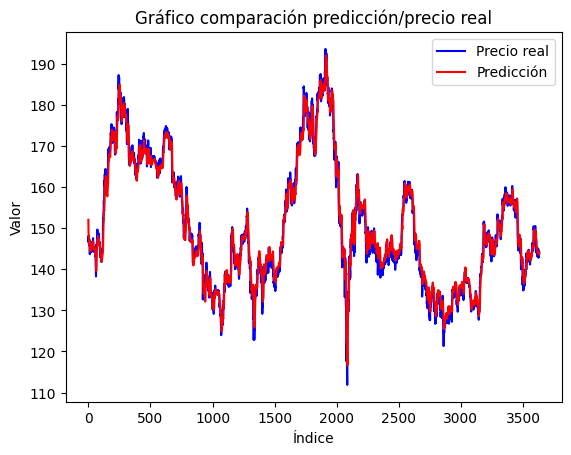

In [52]:
Testrpr = []
for i in range(7,df_test.shape[0]):
    Testrpr.append(df_test.iloc[i].close)
plt.plot(Testrpr, color='blue', label='Precio real')  # Línea azul
plt.plot(y_predT, color='red', label='Predicción')   # Línea roja
plt.title('Gráfico comparación predicción/precio real')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend() 

plt.show()

In [53]:
y_pred_auxT=[]
for elem in y_predT:
    y_pred_auxT.append(elem[0])
y_pred_auxT = np.array(y_pred_auxT)

In [54]:
suma = 0
n = len(Testrpr)
mae = np.mean(np.abs(Testrpr - y_pred_auxT))
print("El error medio absoluto es: " + str(mae))
for i in range(0,n):
    suma = abs(y_pred_auxT[i] - Testrpr[i])/Testrpr[i] +  suma
error_medio = suma/n
emp = error_medio*100 # error medio en porcentaje
print("El error medio porcentualemente es: " + str(emp))

El error medio absoluto es: 1.4905542205608886
El error medio porcentualemente es: 1.002392201955476


In [55]:
model.save('mi_modelo_densoIMC3_96.h5')

# Entrenamos un modelo LSTM

In [56]:
from tensorflow.keras.layers import LSTM

In [57]:
modelLSTM = Sequential()
modelLSTM.add(LSTM(64, activation='relu', input_shape=(7, 5)))
modelLSTM.add(Dense(1))

C:\Users\raulg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [58]:
modelLSTM.compile(optimizer='adam', loss='mape')

In [59]:
historyLSTM = modelLSTM.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_vali, y_vali), shuffle=False)

Epoch 1/10
797/797 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 18.7601 - val_loss: 6.7818
Epoch 2/10
797/797 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 16.1095 - val_loss: 1.8124
Epoch 3/10
797/797 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 8.4761 - val_loss: 2.5219
Epoch 4/10
797/797 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 6.0157 - val_loss: 1.6906
Epoch 5/10
797/797 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 5.5336 - val_loss: 1.3669
Epoch 6/10
797/797 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.7282 - val_loss: 1.4925
Epoch 7/10
797/797 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 4.4386 - val_loss: 1.4643
Epoch 8/10
797/797 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 6.4375 - val_loss: 1.1054
Epoch 9/10
797/797 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 6.5442 - val_loss: 1.3855
Epoch 10/10
797/797 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 5.3186 - val_loss: 1.1359


In [60]:
y_predLSTM = modelLSTM.predict(X_vali)
y_predLSTM

228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[ 22.109861],
       [ 22.098501],
       [ 22.068373],
       ...,
       [155.15477 ],
       [155.02867 ],
       [155.53786 ]], dtype=float32)

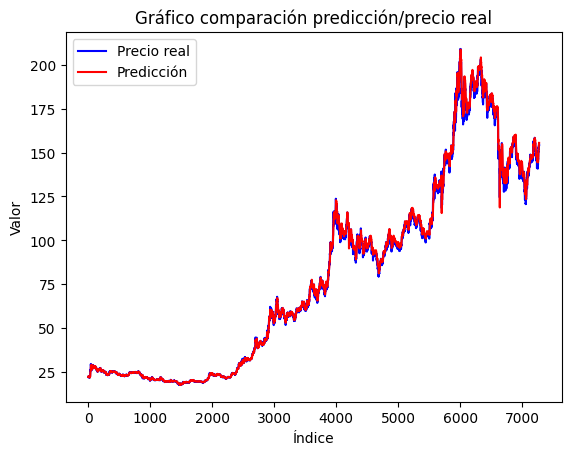

In [61]:
Valirpr = []
for i in range(7,df_vali.shape[0]):
    Valirpr.append(df_vali.iloc[i].close)
plt.plot(Valirpr, color='blue', label='Precio real')  # Línea azul
plt.plot(y_predLSTM, color='red', label='Predicción')   # Línea roja
plt.title('Gráfico comparación predicción/precio real')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend() 

plt.show()

In [62]:
y_pred_auxLSTM=[]
for elem in y_predLSTM:
    y_pred_auxLSTM.append(elem[0])
y_pred_auxLSTM = np.array(y_pred_auxLSTM)

In [63]:
suma = 0
n = len(Valirpr)
mae = np.mean(np.abs(Valirpr - y_pred_auxLSTM))
print("El error medio absoluto es: " + str(mae))
for i in range(0,n):
    suma = abs(y_pred_auxLSTM[i] - Valirpr[i])/Valirpr[i] +  suma
error_medio = suma/n
emp = error_medio*100 # error medio en porcentaje
print("El error medio porcentualemente es: " + str(emp))

El error medio absoluto es: 1.0755285687645249
El error medio porcentualemente es: 1.1359026971061008


Probamos los datos de test

In [64]:
df_test_aux = df_test[['open', 'high', 'low', 'close', 'value']].values
X_test, y_test = create_sequences(df_test_aux, 7)
X_test

array([[[154.35, 154.5 , 153.45, 154.1 ,  66.  ],
        [154.1 , 154.8 , 153.25, 154.15,  66.  ],
        [154.15, 154.3 , 153.25, 154.15,  66.  ],
        ...,
        [155.05, 155.4 , 153.1 , 153.3 ,  66.  ],
        [153.3 , 153.7 , 152.45, 153.05,  66.  ],
        [153.05, 153.25, 145.75, 147.5 ,  66.  ]],

       [[154.1 , 154.8 , 153.25, 154.15,  66.  ],
        [154.15, 154.3 , 153.25, 154.15,  66.  ],
        [154.15, 155.2 , 153.  , 155.05,  66.  ],
        ...,
        [153.3 , 153.7 , 152.45, 153.05,  66.  ],
        [153.05, 153.25, 145.75, 147.5 ,  66.  ],
        [147.5 , 148.65, 145.35, 146.95,  66.  ]],

       [[154.15, 154.3 , 153.25, 154.15,  66.  ],
        [154.15, 155.2 , 153.  , 155.05,  66.  ],
        [155.05, 155.4 , 153.1 , 153.3 ,  66.  ],
        ...,
        [153.05, 153.25, 145.75, 147.5 ,  66.  ],
        [147.5 , 148.65, 145.35, 146.95,  66.  ],
        [146.95, 148.8 , 145.15, 148.  ,  66.  ]],

       ...,

       [[143.3 , 145.1 , 142.7 , 145.05,  

In [65]:
y_predLSTMt = modelLSTM.predict(X_test)
y_predLSTMt

114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 708us/step


array([[153.50363],
       [151.73015],
       [151.25244],
       ...,
       [145.05556],
       [145.34706],
       [145.48589]], dtype=float32)

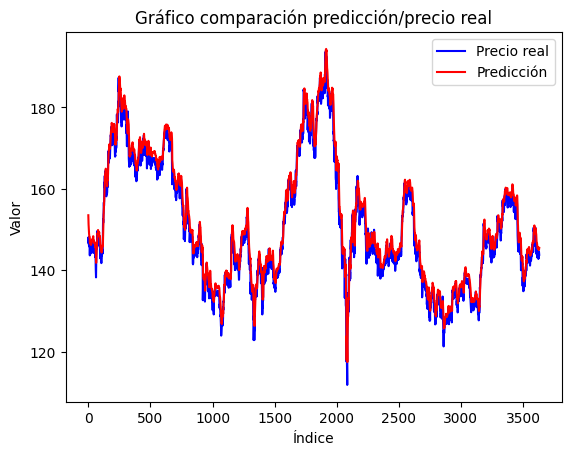

In [66]:
Testrpr = []
for i in range(7,df_test.shape[0]):
    Testrpr.append(df_test.iloc[i].close)
plt.plot(Testrpr, color='blue', label='Precio real')  # Línea azul
plt.plot(y_predLSTMt, color='red', label='Predicción')   # Línea roja
plt.title('Gráfico comparación predicción/precio real')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend() 

plt.show()

In [67]:
y_pred_auxLSTM=[]
for elem in y_predLSTMt:
    y_pred_auxLSTM.append(elem[0])
y_pred_auxLSTM = np.array(y_pred_auxLSTM)

In [68]:
suma = 0
n = len(Testrpr)
mae = np.mean(np.abs(Testrpr - y_pred_auxLSTM))
print("El error medio absoluto es: " + str(mae))
for i in range(0,n):
    suma = abs(y_pred_auxLSTM[i] - Testrpr[i])/Testrpr[i] +  suma
error_medio = suma/n
emp = error_medio*100 # error medio en porcentaje
print("El error medio porcentualemente es: " + str(emp))

El error medio absoluto es: 1.9596235132427469
El error medio porcentualemente es: 1.3109361855559947


In [69]:
#modelLSTM.save('mi_modelo_lstmICM10_32.h5')

In [70]:
def eval(Valirpr, y_pred_aux):
    suma = 0
    n = len(Valirpr)
    for i in range(0,n):
        suma = abs(y_pred_aux[i] - Valirpr[i])/Valirpr[i] +  suma
    error_medio = suma/n
    emp = error_medio*100 # error medio en porcentaje
    return emp

In [71]:
def rpr_prep(df):
    Testrpr = []
    for i in range(7,df.shape[0]):
        Testrpr.append(df.iloc[i].close)
    return Testrpr

In [73]:
def y_aux_prep(y_predLSTMt):
    y_pred_auxLSTM=[]
    for elem in y_predLSTMt:
        y_pred_auxLSTM.append(elem[0])
    y_pred_auxLSTM = np.array(y_pred_auxLSTM)
    return y_pred_auxLSTM

In [90]:
def trainLSTM(modelLSTM, X_train, y_train, X_vali, y_vali, X_test):
    mejor_valor = 100.0
    for e in range(1, 30):
        for b in range(1,256):
            for i in range(0, 50):
                historyLSTM = modelLSTM.fit(X_train, y_train, epochs=e, batch_size=b, validation_data=(X_vali, y_vali), shuffle=False)
                y_predLSTM = modelLSTM.predict(X_test)
                valor = eval(rpr_prep(df_test), y_aux_prep(y_predLSTM))
                if valor < mejor_valor and valor < 1.0:
                    mejor_valor = valor
                    stri = "modelos_lstm\mi_modelo_lstmICM" + str(e) + "_" + str(b) + "_" + str(round(valor, 4)) + ".h5"
                    modelLSTM.save(stri)
                    
    
    
    
        
    

In [91]:
trainLSTM(modelLSTM, X_train, y_train, X_vali, y_vali, X_test)

Epoch 1/5
797/797 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.3277 - val_loss: 0.7601
Epoch 2/5
797/797 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.1975 - val_loss: 0.7670
Epoch 3/5
797/797 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.1808 - val_loss: 0.7695
Epoch 4/5
797/797 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.1266 - val_loss: 0.7674
Epoch 5/5
797/797 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.2250 - val_loss: 0.7669
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 708us/step


Epoch 1/5
797/797 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.1416 - val_loss: 0.7937
Epoch 2/5
797/797 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.1166 - val_loss: 0.7960
Epoch 3/5
797/797 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.0360 - val_loss: 0.7823
Epoch 4/5
797/797 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.2275 - val_loss: 0.7684
Epoch 5/5
797/797 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.1277 - val_loss: 0.7838
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 708us/step
Epoch 1/5
797/797 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.1812 - val_loss: 0.7783
Epoch 2/5
797/797 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.2111 - val_loss: 0.7723
Epoch 3/5
797/797 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.1973 - val_loss: 0.7739
Epoch 4/5
797/797 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.1188 - val_loss: 0.7790
Epoch 5/5
797/797 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.1619 - val_loss: 0.7964
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 717us/step
Epoch 1/5
797/797 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.128

KeyboardInterrupt: 